In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
import pandas as pd
df = pd.read_csv('metadata_compiled.csv')    # upload metadata csv file on colab from the downloaded location on PC
df.head()

,Unnamed: 0,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,00098cdb-4da1-4aa7-825a-4f1b9abc214b,2021-01-22T22:08:06.742577+00:00,0.1133,47.4,9.4,66.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = df[df.cough_detected >= 0.8]   # Filtering dataset to contain samples without non-cough events
data.head()

,Unnamed: 0,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
1,1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,2020-04-13T22:23:06.997578+00:00,0.9968,NaN,NaN,21.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,0028b68c-aca4-4f4f-bb1d-cb4ed5bbd952,2020-05-24T12:12:46.394647+00:00,0.8937,NaN,NaN,28.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,13,00291cce-36a0-4a29-9e2d-c1d96ca17242,2020-04-13T15:10:58.405156+00:00,0.9883,39.4,67.2,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(18544, 52)

In [ ]:
# Analysing the age and gender of participants of dataset
data1 = data.dropna(subset = ['age', 'gender'])
data1.isnull().sum()

Unnamed: 0                   0
uuid                         0
datetime                     0
cough_detected               0
latitude                  5431
longitude                 5431
age                          0
gender                       0
respiratory_condition        0
fever_muscle_pain            0
status                       0
status_SSL                6024
quality_1                12351
cough_type_1             12351
dyspnea_1                12351
wheezing_1               12351
stridor_1                12351
choking_1                12351
congestion_1             12351
nothing_1                12351
diagnosis_1              12351
severity_1               12351
quality_2                12335
cough_type_2             12336
dyspnea_2                12335
wheezing_2               12335
stridor_2                12335
choking_2                12335
congestion_2             12335
nothing_2                12335
diagnosis_2              12335
severity_2               12335
quality_

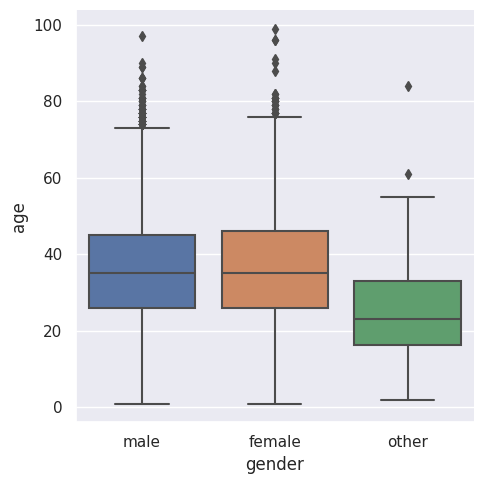

In [ ]:
sns.set()
sns.catplot(x = 'gender', y = 'age', data = data1, kind = 'box')
plt.show()
# This graphs shows that Average age of men and women is almost equal while that of other is much lower

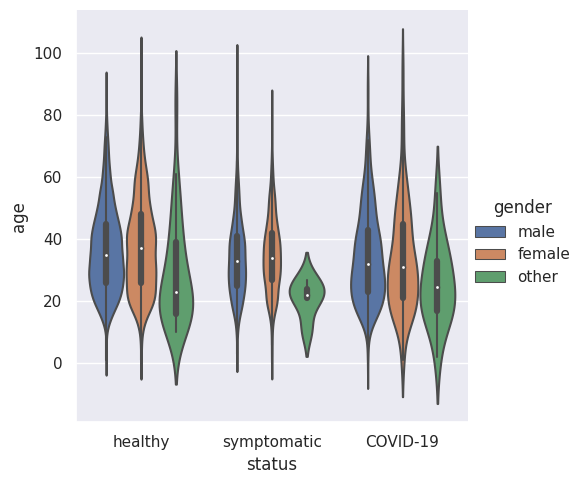

In [ ]:
# Age vs status of participants based on gender
sns.catplot(x = 'status', y = 'age', data = data1, kind = 'violin', hue = 'gender')

In [ ]:
gender_values = data1.gender.value_counts()
gender_values

male      8555
female    4278
other       54
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7f981d79e470>,
 [Text(-0.5415407258276478, 0.9574620839856086, 'male'),
  Text(0.5288899418944948, -0.964507868999957, 'female'),
  Text(1.0999046872377307, -0.014480296698274442, 'others')],
 [Text(-0.2953858504514442, 0.5222520458103319, '66.38'),
  Text(0.2884854228515426, -0.5260952012727037, '33.20'),
  Text(0.5999480112205803, -0.00789834365360424, '0.42')])

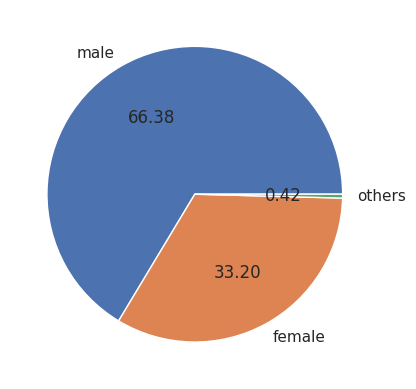

In [ ]:
# Percentage of male, female and other in metadata
genders = ['male', 'female', 'others']
genders_count = [gender_values[0], gender_values[1], gender_values[2]]
plt.pie(genders_count, labels=genders, autopct='%.2f')


In [ ]:
data1.tail()

,Unnamed: 0,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
34421,34421,ffe0658f-bade-4654-ad79-40a468aabb03,2020-04-14T01:58:32.200245+00:00,0.9846,41.6,60.9,22.0,male,True,True,...,poor,unknown,False,False,False,False,False,False,NaN,unknown
34422,34422,ffe13fcf-c5c2-4a6a-a9fc-e010f4f033c1,2020-04-13T21:08:50.708320+00:00,0.9485,41.1,28.8,31.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34425,34425,ffedc843-bfc2-4ad6-a749-2bc86bdac84a,2020-06-05T03:41:37.481463+00:00,0.9498,-34.5,-58.5,23.0,male,False,False,...,good,dry,False,False,False,False,False,True,healthy_cough,pseudocough
34426,34426,ffeea120-92a4-40f9-b692-c3865c7a983f,2020-05-02T10:18:27.348859+00:00,0.9784,14.3,121.1,22.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34433,34433,fffd1834-6cf2-4782-bb30-04c31b46a1fe,2021-07-21T13:16:19.493451+00:00,0.9754,NaN,NaN,22.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data1.isnull().sum()

Unnamed: 0                   0
uuid                         0
datetime                     0
cough_detected               0
latitude                  5431
longitude                 5431
age                          0
gender                       0
respiratory_condition        0
fever_muscle_pain            0
status                       0
status_SSL                6024
quality_1                12351
cough_type_1             12351
dyspnea_1                12351
wheezing_1               12351
stridor_1                12351
choking_1                12351
congestion_1             12351
nothing_1                12351
diagnosis_1              12351
severity_1               12351
quality_2                12335
cough_type_2             12336
dyspnea_2                12335
wheezing_2               12335
stridor_2                12335
choking_2                12335
congestion_2             12335
nothing_2                12335
diagnosis_2              12335
severity_2               12335
quality_

In [ ]:
data1.columns

Index(['Unnamed: 0', 'uuid', 'datetime', 'cough_detected', 'latitude',
       'longitude', 'age', 'gender', 'respiratory_condition',
       'fever_muscle_pain', 'status', 'status_SSL', 'quality_1',
       'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1',
       'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1', 'quality_2',
       'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2', 'choking_2',
       'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2', 'quality_3',
       'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3', 'choking_3',
       'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3', 'quality_4',
       'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4', 'choking_4',
       'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

In [ ]:
# Diagnosis 1 analysis
data2 = data1.dropna(subset = ['diagnosis_1'])


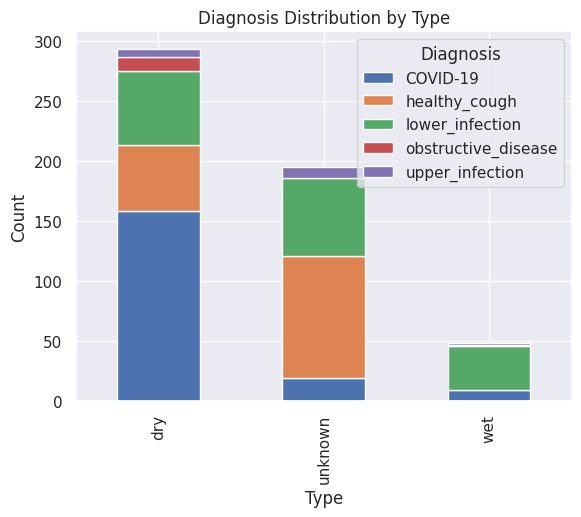

In [ ]:
crosstab = pd.crosstab(data2['cough_type_1'], data2['diagnosis_1'])
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Diagnosis Distribution by Type')
plt.legend(title='Diagnosis')